# Using Evolutionary Algorithms to Auto Balance Chemical Equations

Equation:

$\alpha N_2 + \beta H_2 → \gamma NH_3$

This can be set up as a linear algebra problem as seen in the following step:

Nitrogen:

$2 \alpha + 0 \beta = 1 \gamma ⇔ 2 \alpha + 0 \beta - 1 \gamma = 0 $

Applying the same logic to each of the chemicals (for the H) you get the following representation as a dot product:

$C = \begin{bmatrix} 2 & 0 & -1 \\0 & 2 & -3 \\\end{bmatrix}$

$V = \begin{bmatrix} \alpha \\ \beta \\ \gamma \end{bmatrix}$

Here the number of rows in C are the number of unique elements in the equation and the number of rows in V are the number of unique reactants and products.

$C \cdot V = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

The following vectorized implementation of the problem is described below:

In [120]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
a = 1
b = 10
c = 4

def loss(individuals): # calculate the mse compared to the output after substituting alpha, beta and gamma with the null matrix which is the optimum result

  coeff = np.array([[2,0,-1], [0, 2, -3]])

  product = np.dot(coeff, individuals.T)

  truth = np.zeros((2, 1))

  mse = np.sum(np.power((truth-product),2), axis=0)*(1/product.size)

  return mse

In [122]:
from random import randint

def generate(a1, a2, b1, b2, c1, c2, n): #generate individuals in a population between a min and max range
  individuals = []
  for i in range(n):
    individuals.append([randint(a1, a2), randint(b1,b2), randint(c1,c2)])
  
  return np.array(individuals)


def converge(epochs, numIndividuals, percentileNum): #decrease numIndividuals per epoch?

  lossPerEpoch = []

  bestIndividuals = []

  initialize = [1,1,1,30,30,30] #initialize the ranges between which individuals can be generated 

  for i in range(epochs): #iterate through epochs

    individuals = generate(initialize[0], initialize[3], initialize[1], initialize[4], initialize[2], initialize[5], numIndividuals) #generate individuals

    costs = loss(individuals) #find the total loss of each individual or combination of alpha, beta and gamma through the mse function in comparison to the null matrix

    percentile = np.percentile(costs, percentileNum) #pick out the lowest nth percentile of the population

    nextGen = np.where(costs <= percentile)[0]

    averageCost = np.mean(costs[nextGen])

    bestIndividual = individuals[np.where(costs == np.min(costs))][0]

    bestIndividuals.append(bestIndividual)

    lossPerEpoch.append(averageCost)

    max = np.max((individuals[nextGen].T), axis=1) #find the minimum value for alpha, beta, gamma in the lowest nth percentile
    min = np.min((individuals[nextGen].T), axis=1) #find the maximum value for alpha, beta, gamma in the lowest nth percentile

    initialize = np.array([min, max]).flatten() 
    #set the new maximum and minimum values (for alpha, beta and gamma) for generating individuals in the new epoch as the 
    #values for the most fit combinations in the previous generation as calculated in the lines above
  
  return lossPerEpoch, bestIndividuals

  
lossPerEpoch, bestIndividuals = converge(15, 50, 20)

print(lossPerEpoch, bestIndividuals)

plt.plot(lossPerEpoch)
    

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


ValueError: ignored

The loss curve shows a good convergance that is quick along with a good shape for the curve as it is not getting stuck, not varying too much and is not increasing therefore showing that the model is taking steps towards the optimum and the steps are getting closer and closer as the loss is decreasing at a slower and slower rate therefore showing that it is reaching an optimum.

The optimum it reached was:

$\alpha = 5, \beta = 15, \gamma = 10$

which when reduced to its simplest form is:

$\alpha = 1, \beta = 3, \gamma = 2$

this is the answer we are expecting through the normal guess and check method. However, this shows that there are mutliple optima or a valley in the higher dimensional space of the function that the model is optimizing where there is a line of points that are a minima as any values in the ratio of 1:3:2 are solutions to the equation. One could argue that a classical optimizer like gradient would get stuck in such a situation however, this is an area of exploration and extension.

In [4]:
np.array(bestIndividuals).shape

(15, 3)

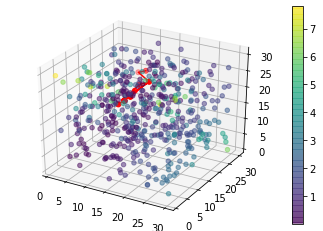

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(1, 30, 500)
np.random.shuffle(x)
y = np.linspace(1, 30, 500)
np.random.shuffle(y)
z = np.linspace(1, 30, 500)
np.random.shuffle(z)

c = loss(np.vstack((x,y,z)).T)

img = ax.scatter(x, y, z, c=c, cmap=plt.viridis(), alpha=0.5)

points = np.array(bestIndividuals)

fig.colorbar(img)

img = ax.plot(points[:,0], points[:,1], points[:,2], c="red")
img = ax.scatter(points[:,0], points[:,1], points[:,2], s=25, c="red")


plt.show()



Above is a 3d scatter plot where the points colored in the purple to yellow scale are different combinations of $\alpha, \beta, \gamma$ and their corresponding mse score when they are fed into the hypothesis function. The red line represents the final prediction of the model after each epoch therefore showing how the function converges. The space of solutions highlights the existance of different local minima.

Extension and Notes:

- plot points from each epoch using plt.plot
- 1st approach is an example of gaussian elimination on a basic equation, the second is a generalized version of the approach using floor and rounding, the next is using altenrate approach which is optimization using evolutionary algorithms as the problem has a non convex plane (how to show this??)
- derive mse from linear distance on carteisan plane using euclidian distane and extrapolate from there (why average)? how to show that the evolutionary alogirthm is converging? investigate the effect of each of the hyperparameters.
- how reliable is the method? better hyperparameter tuning fixes this?

- this could be a differnt take on the problem and offer a new perspective. The effectivness of this in solving for whole number solutions can also be investigated.

- is the reaction feasable? is it unique? what are the theoretical space of solutions using vector algebra?

- **Use this as a way to investigate how the scipy matrix and lcm solvers work?**

- most other methods on the interent use the solver from scipy but use this method? - search

- implement gauss jordan?

In [137]:
#gradient descent 

from sklearn.metrics import mean_squared_error
import random
import numpy as np

X = np.array([[2,0,-1], [0,2,-3]])
y = np.zeros((2,1))

def hypothesis(X, theta):
  return X.dot(theta)

def gradDesc(X, y, alpha=0.3, epochs=20):

  a = random.randint(1,30)
  b = random.randint(1,30)
  c = random.randint(1,30)

  mse = []
  history = [] 

  N = np.shape(X)[0]

  theta = np.array([a,b,c]).reshape(3,1)

  for i in range(epochs):

    preds = hypothesis(X, theta).reshape(2,1)
    #print(preds.shape)

    f = y - preds
    #print(f.shape)
 
    theta = theta - (alpha * ((1/N) * (-2*X.T).dot(f)))
    #print(theta.shape)

    history.append([theta])
    mse.append(mean_squared_error(y, preds))

    a = theta[0]
    b = theta[1]
    c = theta[2]
  
  return history, mse

history, mse = gradDesc(X, y)

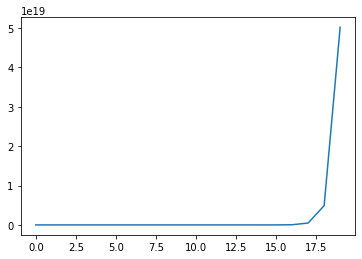

In [139]:
import matplotlib.pyplot as plt

plt.plot(mse)

In [118]:
np.array(history).reshape(20,3).shape

(20, 3)

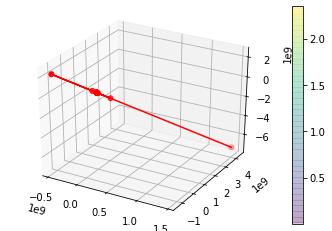

In [138]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(5, 20, 500)
np.random.shuffle(x)
y = np.linspace(5, 20, 500)
np.random.shuffle(y)
z = np.linspace(5, 20, 500)
np.random.shuffle(z)

c = loss(np.vstack((x,y,z)).T)

img = ax.scatter(x, y, z, c=c, cmap=plt.viridis(), alpha=0.2)

points = np.array(history).reshape(20,3)

fig.colorbar(img)

img = ax.plot(points[:,0], points[:,1], points[:,2], c="red")
img = ax.scatter(points[:,0], points[:,1], points[:,2], s=25, c="red")


plt.show()

In [85]:
a = random.randint(1,30)
b = random.randint(1,30)
c = random.randint(1,30)

mse = []
log = [] 

N = np.shape(X)[0]

theta = np.array([a,b,c]).reshape(3,1)

X = np.array([[2,0,-1], [0,2,-3]])
y = np.zeros((2,1))

In [17]:

theta.shape

(3, 1)

In [98]:
print(theta)

preds = hypothesis(X, theta).reshape(2,1)
print(preds)

alpha = 0.05

f = y - preds
print(f)

print(f.shape)
theta = theta - (alpha * ((1/N) * (-2*X.T).dot(f)))
print(theta)

[[ 7.49478013]
 [20.83507294]
 [14.00000053]]
[[ 0.98955972]
 [-0.32985572]]
[[-0.98955972]
 [ 0.32985572]]
(2, 1)
[[ 7.39582415]
 [20.86805851]
 [14.00000016]]


In [58]:
theta - ((-2*X.T).dot(f))/N*alpha

array([[-8.],
       [-2.],
       [50.]])

Compare how much gradient descent relies on hyperparameters and initialization but evolutoanry algirithms are less sensitive to small changes in hyper parameter so it could be said that EA's are more robust?

Compare the 3rd plots and the convergence loss functions. Try for a smaller level function but also a higher level problem. Constraint optimization.

Try to compare these to differnet problems like finding the minimum point on a 4th degree polynomial. Try to adopt the algorithms to make own cost functions in the form:

$J(x) = ax^4 +bx^3 + cx +d$

Can we use this to find the lowest point? How to implement both algorithsm without using mean square error? how to find derivative for each of the parameters? Try to find lowest point on quartic function

How to implement this in EA approach? differnt kinds of EA like genetic programming?